<a href="https://colab.research.google.com/github/ksejull/labs/blob/main/%D0%9B%D0%A013_%D0%9B%D1%83%D1%87%D0%B0%D0%BD%D1%96%D0%BD%D0%BE%D0%B2%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лучанінова Ксенія, Група 2-8, Варіант 11

#Лабораторна робота №13

x = [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7]
y = [2.6    2.8718 3.1577 3.4565 3.7664 4.0858 4.4125 4.7445 5.0797 5.4161]


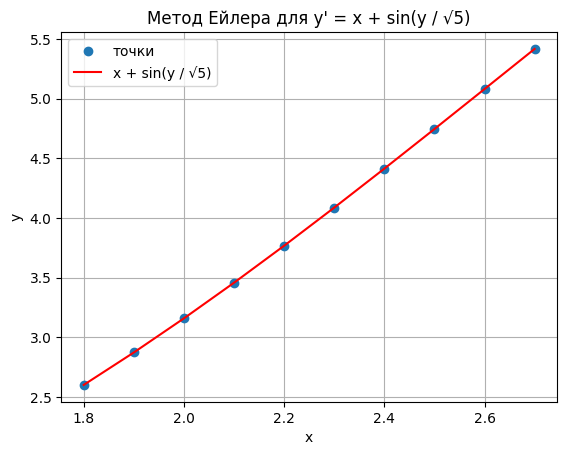

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Описуємо функцію f(x, y)
def f(x, y):
    return x + np.sin(y / np.sqrt(5))

# Вхідні параметри
a, b, h, y0 = 1.8, 2.8, 0.1, 2.6

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

# Кількість кроків
n = int((b - a) / h)

# Задаємо масиви для x та y
x = np.array([a + i*h for i in range(n + 1)])
y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера
for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

# Округлюємо результати до 4 знаків після коми
y_rounded = np.round_(y, 4)

# Виводимо результати
print("x =", x)
print("y =", y_rounded)

# Графічне представлення результатів
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера для y' = x + sin(y / √5)")
plt.legend(["точки", "x + sin(y / √5)"])
plt.grid()
plt.show()

x = [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
y = [2.6        2.87900643 3.17156299 3.47612714 3.79089992 4.11389024
 4.44300059 4.77612631 5.11125773 5.44657406 5.78051936]


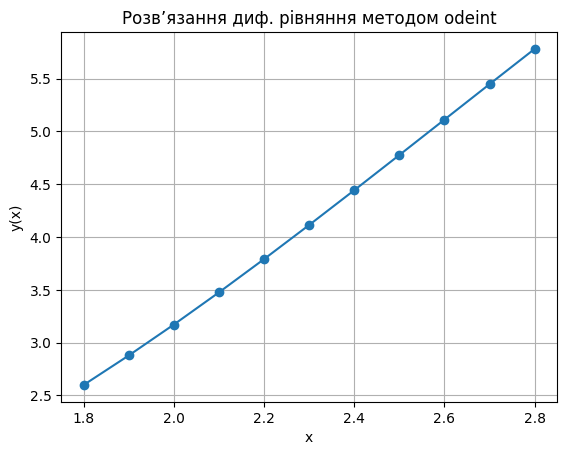

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y / np.sqrt(5))

# Початкова умова
y0 = 2.6

# Значення x
x = np.arange(1.8, 2.8 + 0.1, 0.1)  # Крок 0.1 на відрізку [1.8, 2.8]

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x =', x)
print('y =', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння методом odeint')
plt.grid()
plt.show()

x = [1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8]
y = [2.6        2.87900645 3.17174814 3.47654148 3.79133161 4.11410806
 4.44290471 4.77579985 5.11091612 5.44642055 5.78052453]


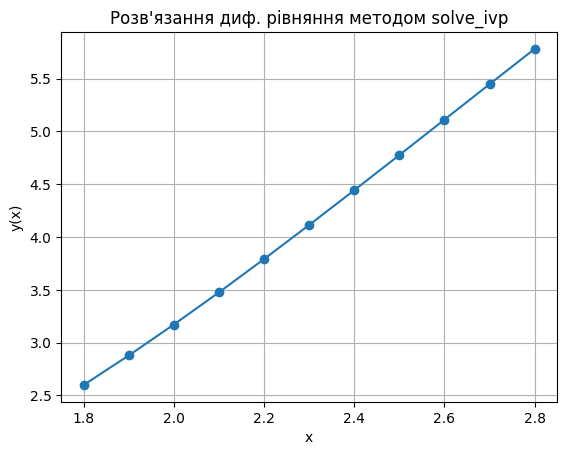

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y / np.sqrt(5))

# Початкова умова (передаємо як список)
y0 = [2.6]

# Значення x для виведення результатів
x = np.linspace(1.8, 2.8, 11)  # 11 точок на відрізку [1.8, 2.8] з кроком 0.1

# Розв'язання ODE за допомогою solve_ivp
sol = solve_ivp(model, [1.8, 2.8], y0, t_eval=x)

# Виведення результатів
print('x =', sol.t)
print('y =', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Розв'язання диф. рівняння методом solve_ivp")
plt.grid()
plt.show()

x = [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y = [4.6    4.766  4.9364 5.1111 5.2899 5.4729 5.6598 5.8508 6.0458 6.2449
 6.4482]


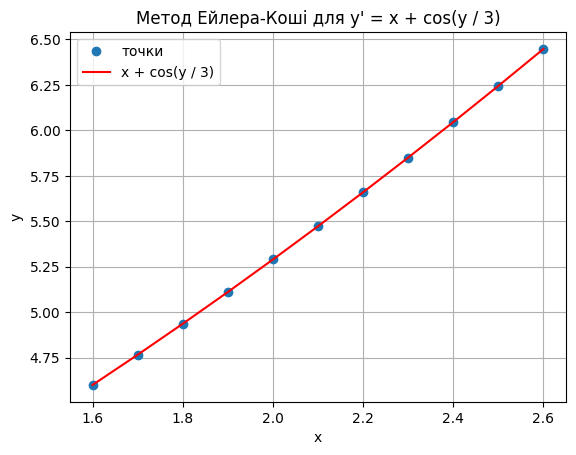

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Описуємо функцію f(x, y)
def f(x, y):
    return x + np.cos(y / 3)

# Вхідні параметри
a, b, h, y0 = 1.6, 2.6, 0.1, 4.6

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

# Кількість кроків
n = int((b - a) / h)

# Генерація x
x = np.arange(a, b + h, h)

# Масив для y
y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    f_i = f(x[i], y[i])
    y_predict = y[i] + h * f_i
    f_predict = f(x[i + 1], y_predict)
    y[i + 1] = y[i] + (f_i + f_predict) * h / 2

# Округлюємо результати до 4 знаків після коми
y_rounded = np.round_(y, 4)

# Виводимо результати
print("x =", x)
print("y =", y_rounded)

# Візуалізація результатів
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші для y' = x + cos(y / 3)")
plt.legend(["точки", "x + cos(y / 3)"])
plt.grid()
plt.show()

x = [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y = [4.6        4.76599212 4.93637986 5.1110343  5.28985118 5.47275279
 5.65968969 5.85064246 6.04562327 6.24467806 6.44788768]


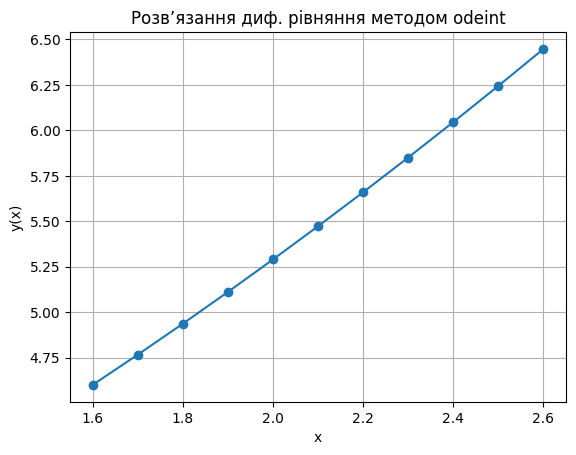

In [6]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y / 3)

# Початкова умова
y0 = 4.6

# Значення x
x = np.arange(1.6, 2.6 + 0.1, 0.1)  # Крок 0.1 на відрізку [1.6, 2.6]

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x =', x)
print('y =', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння методом odeint')
plt.grid()
plt.show()

x = [1.6 1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6]
y = [4.6        4.76599203 4.9363824  5.11104261 5.28986202 5.4727612
 5.65969228 5.85063894 6.04561647 6.24467166 6.44788292]


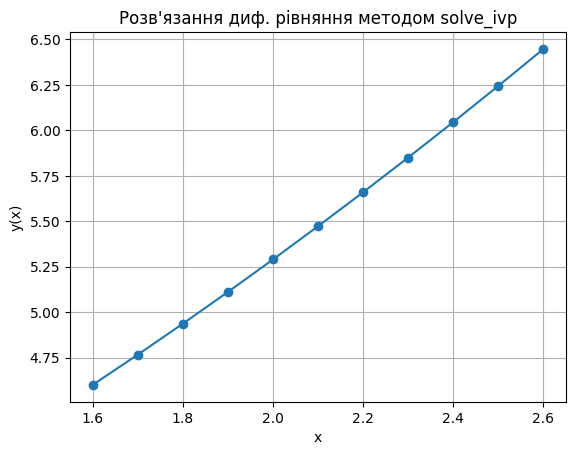

In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y / 3)

# Початкова умова (передаємо як список)
y0 = [4.6]

# Значення x для виведення результатів
x = np.linspace(1.6, 2.6, 11)  # 11 точок на відрізку [1.6, 2.6] з кроком 0.1

# Розв'язання ODE за допомогою solve_ivp
sol = solve_ivp(model, [1.6, 2.6], y0, t_eval=x)

# Виведення результатів
print('x =', sol.t)
print('y =', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Розв'язання диф. рівняння методом solve_ivp")
plt.grid()
plt.show()